In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
import emnist
from pathlib import Path
from pytesseract import image_to_string

2022-11-27 18:08:50.930289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 18:08:51.039088: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-27 18:08:51.043410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ivan/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-27 18:08:51.043454: I te

# Creating model

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
X_train = x_train / 255
X_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [16]:
# type(X_train)
# X_train.shape

In [17]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(200, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(X_train, y_train_cat, batch_size=30, epochs=5, validation_split=0.2)

model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0787 - accuracy: 0.9772


[0.07870718836784363, 0.9771999716758728]

Epoch 1/5
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2589 - accuracy: 0.9255 - val_loss: 0.1351 - val_accuracy: 0.9597
Epoch 2/5
1600/1600 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9675 - val_loss: 0.0983 - val_accuracy: 0.9712
Epoch 3/5
1600/1600 [==============================] - 3s 2ms/step - loss: 0.0727 - accuracy: 0.9780 - val_loss: 0.0917 - val_accuracy: 0.9727
Epoch 4/5
1600/1600 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0979 - val_accuracy: 0.9705
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0736 - accuracy: 0.9765


[0.07362104952335358, 0.9764999747276306]

# Preprocessing data

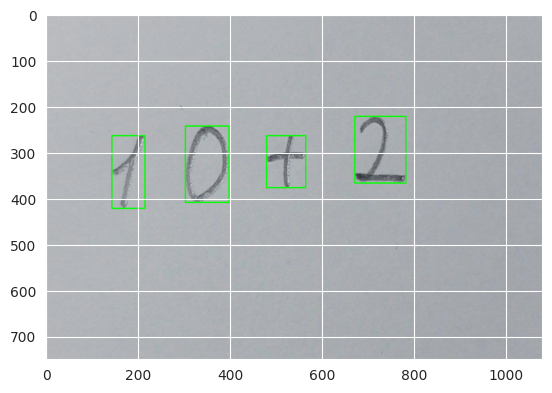

In [19]:
image = cv2.imread('../data/test/test_image_2.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

# обрезка шума               изображение, порог, светлые, темные
ret, thresh = cv2.threshold(grey.copy(), 160, 255, cv2.THRESH_BINARY_INV)
# поиск контуров
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)

    # пропуск шумов
    if (w < 10 or h < 50):
        continue

    # Создание прямоугольника вокруг цифры на исходном изображении (для отображения цифр, выбранных с помощью контуров)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    # Вырезание цифры из изображения, соответствующей текущим контурам в цикле for
    digit = thresh[y:y+h, x:x+w]

    # Изменение размера этой цифры на (18, 18)
    resized_digit = cv2.resize(digit, (18,18))

    # Дополняем цифру 5 пикселями черного цвета (нулями) с каждой стороны, чтобы в конечном итоге получить изображение (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

    # Добавление предварительно обработанной цифры в список предварительно обработанных цифр
    preprocessed_digits.append(padded_digit)
    # print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()

inp = np.array(preprocessed_digits)


=========PREDICTION============ 


1/1 [==============================] - 0s 138ms/step


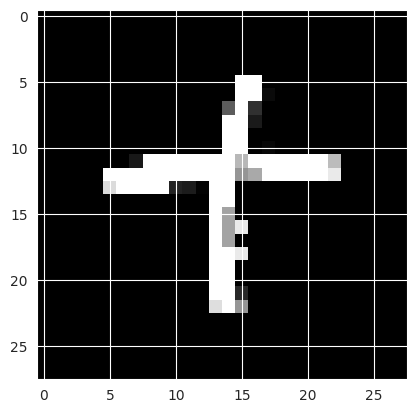


Final Output: 3

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 39ms/step


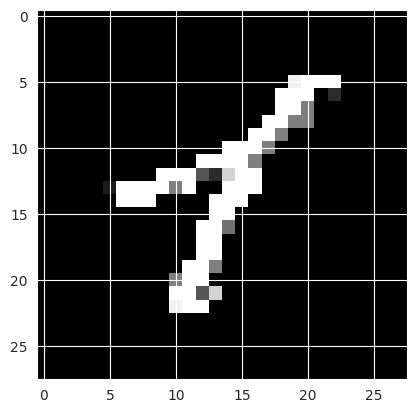


Final Output: 1

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 37ms/step


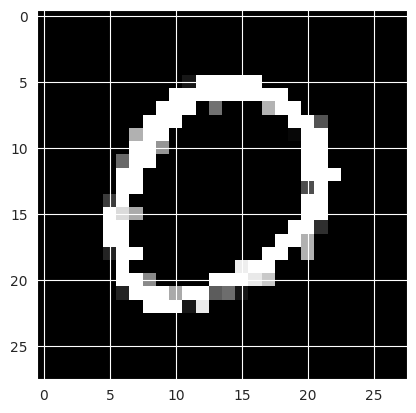


Final Output: 0

---------------------------------------

=========PREDICTION============ 


1/1 [==============================] - 0s 23ms/step


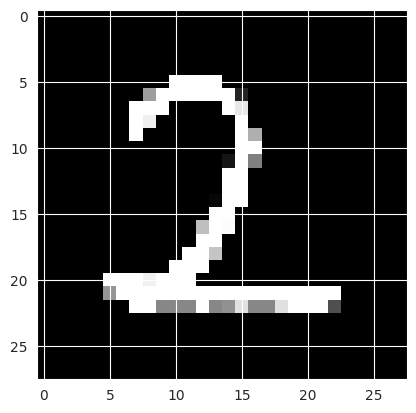


Final Output: 2

---------------------------------------



In [20]:
for digit in preprocessed_digits:
    print ("=========PREDICTION============ \n\n")
    prediction = model.predict(digit.reshape(1, 28, 28, 1))

#   вывод картинки
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
#   вывод результата
    print("\nFinal Output: {}".format(np.argmax(prediction)))
#   вывод вектора
#     print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
#     hard_maxed_prediction = np.zeros(prediction.shape)
#     hard_maxed_prediction[0][np.argmax(prediction)] = 1
#     print ("\nHard-maxed form of the prediction: \n {}".format(hard_maxed_prediction))
    print ("\n---------------------------------------\n")